# Quantitative Risk Analysis with Value at Risk (VaR)

This project performs a comprehensive risk analysis of a portfolio using different Value at Risk (VaR) methods. We will compare the following methods:

- **Historical Simulation**: Calculates VaR based on historical data distribution.
- **Parametric VaR**: Uses the normal distribution of returns to compute VaR.
- **Monte Carlo Simulation**: Simulates price paths and estimates VaR using those simulations.

We will visualize the results for each method and compare them.

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

### Step 1: Download Historical Data

We will use Yahoo Finance to download stock data for multiple assets in the portfolio. For this example, we will use Apple, Microsoft, and Tesla stocks.

In [11]:
# Define tickers for the portfolio
tickers = ['AAPL', 'MSFT', 'TSLA']

# Download historical stock data for the past 2 years
data = yf.download(tickers, start="2023-01-01", end="2025-03-01")['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


### Step 2: Compute Portfolio Returns

Assuming equal weights for the portfolio, we will calculate the overall portfolio returns.

In [12]:
# Assuming equal weights for each stock in the portfolio
weights = np.ones(len(tickers)) / len(tickers)

# Compute portfolio daily returns
portfolio_returns = returns.dot(weights)

### Step 3: Calculate VaR Using Historical Simulation

VaR is calculated using the historical distribution of portfolio returns by taking the 5th percentile of the returns.

In [13]:
# Historical Simulation VaR (1-day VaR at 95% confidence level)
historical_var = np.percentile(portfolio_returns, 5)  # 5th percentile for 95% confidence
print(f"Historical VaR (95% confidence): {historical_var * 100:.2f}%")

Historical VaR (95% confidence): -2.55%


### Step 4: Calculate VaR Using Parametric Method

This method assumes that the returns of the portfolio follow a normal distribution. We will use the mean and standard deviation to compute VaR.

In [14]:
# Parametric VaR (using the normal distribution)
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()

# 1-day VaR at 95% confidence level (using the normal distribution)
parametric_var = norm.ppf(0.05, mean_return, std_return)  # 5th percentile of normal distribution
print(f"Parametric VaR (95% confidence): {parametric_var * 100:.2f}%")

Parametric VaR (95% confidence): -2.66%


### Step 5: Calculate VaR Using Monte Carlo Simulation

Here, we simulate random future price paths based on historical data and calculate the VaR based on these simulations.

In [15]:
# Monte Carlo Simulation for VaR (1-day VaR at 95% confidence level)
num_simulations = 10000
simulated_returns = np.random.normal(mean_return, std_return, num_simulations)

# Calculate the 5th percentile (VaR at 95% confidence level)
monte_carlo_var = np.percentile(simulated_returns, 5)
print(f"Monte Carlo Simulation VaR (95% confidence): {monte_carlo_var * 100:.2f}%")


Monte Carlo Simulation VaR (95% confidence): -2.68%


### Step 6: Visualize the Results

We will visualize the distribution of portfolio returns and the calculated VaR using each method.

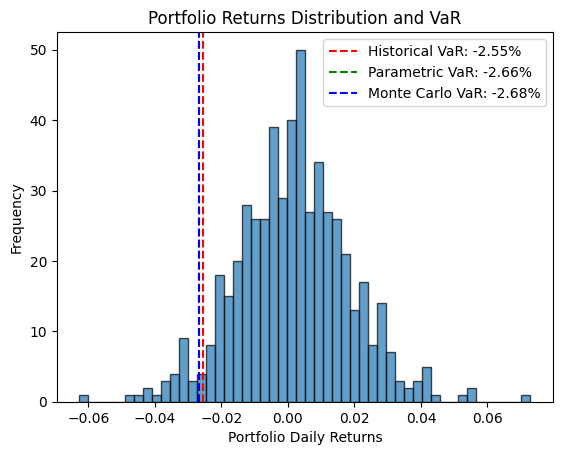

In [16]:
# Plotting the distribution of portfolio returns
plt.hist(portfolio_returns, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(x=historical_var, color='r', linestyle='--', label=f"Historical VaR: {historical_var * 100:.2f}%")
plt.axvline(x=parametric_var, color='g', linestyle='--', label=f"Parametric VaR: {parametric_var * 100:.2f}%")
plt.axvline(x=monte_carlo_var, color='b', linestyle='--', label=f"Monte Carlo VaR: {monte_carlo_var * 100:.2f}%")

plt.title("Portfolio Returns Distribution and VaR")
plt.xlabel("Portfolio Daily Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# VaR using OOP

# Quantitative Risk Analysis with Value at Risk (VaR) - OOP Implementation

This notebook demonstrates the calculation of **Value at Risk (VaR)** for a portfolio using three methods:
- Historical Simulation
- Parametric VaR
- Monte Carlo Simulation

We will implement this analysis in an **Object-Oriented Programming (OOP)** style to keep the code modular, reusable, and scalable.


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

### Step 1: Download Historical Data

We will use Yahoo Finance to download stock data for multiple assets in the portfolio. For this example, we will use Apple, Microsoft, and Tesla stocks.


In [18]:
# Define tickers for the portfolio
tickers = ['AAPL', 'MSFT', 'TSLA']

# Download historical stock data for the past 2 years
data = yf.download(tickers, start="2023-01-01", end="2025-01-01")['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


### Step 2: Define Portfolio and Create a Portfolio Class

We will define a **Portfolio** class to manage the assets and handle the portfolio returns calculation.

In [19]:
class Portfolio:
    def __init__(self, tickers, weights=None):
        self.tickers = tickers
        self.weights = weights if weights else np.ones(len(tickers)) / len(tickers)
        self.data = None
        self.returns = None

    def fetch_data(self, start_date, end_date):
        """Fetch stock data from Yahoo Finance."""
        data = yf.download(self.tickers, start=start_date, end=end_date)['Close']
        self.data = data
        self.returns = data.pct_change().dropna()

    def portfolio_returns(self):
        """Calculate portfolio returns based on weights."""
        return self.returns.dot(self.weights)


### Step 3: Define a RiskModel Class

We will define a `RiskModel` class to calculate and visualize VaR using three different methods: Historical Simulation, Parametric VaR, and Monte Carlo Simulation.

In [20]:
class RiskModel:
    def __init__(self, portfolio):
        self.portfolio = portfolio
        self.portfolio_returns = portfolio.portfolio_returns()

    def historical_var(self, confidence_level=0.05):
        """Calculate VaR using Historical Simulation."""
        return np.percentile(self.portfolio_returns, 100 * confidence_level)

    def parametric_var(self, confidence_level=0.05):
        """Calculate VaR using Parametric Method (Normal Distribution)."""
        mean_return = self.portfolio_returns.mean()
        std_return = self.portfolio_returns.std()
        return norm.ppf(confidence_level, mean_return, std_return)

    def monte_carlo_var(self, confidence_level=0.05, num_simulations=10000):
        """Calculate VaR using Monte Carlo Simulation."""
        mean_return = self.portfolio_returns.mean()
        std_return = self.portfolio_returns.std()
        simulated_returns = np.random.normal(mean_return, std_return, num_simulations)
        return np.percentile(simulated_returns, 100 * confidence_level)

    def visualize_var(self, historical, parametric, monte_carlo):
        """Visualize the VaR calculations."""
        plt.hist(self.portfolio_returns, bins=50, edgecolor='k', alpha=0.7)
        plt.axvline(x=historical, color='r', linestyle='--', label=f"Historical VaR: {historical * 100:.2f}%")
        plt.axvline(x=parametric, color='g', linestyle='--', label=f"Parametric VaR: {parametric * 100:.2f}%")
        plt.axvline(x=monte_carlo, color='b', linestyle='--', label=f"Monte Carlo VaR: {monte_carlo * 100:.2f}%")
        plt.title("Portfolio Returns Distribution and VaR")
        plt.xlabel("Portfolio Daily Returns")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

### Step 4: Use OOP for Full Risk Analysis with Portfolio Data

We will instantiate the **Portfolio** and **RiskModel** classes to run the full risk analysis with VaR calculations.

[*********************100%***********************]  3 of 3 completed


Historical VaR (95% confidence): -2.53%
Parametric VaR (95% confidence): -2.54%
Monte Carlo VaR (95% confidence): -2.53%


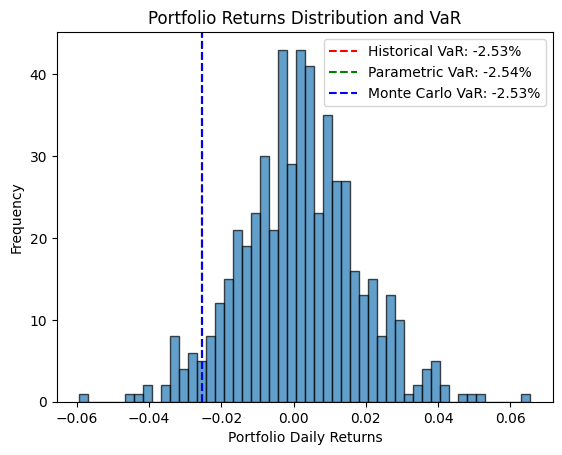

In [21]:
# Create a Portfolio object with stock tickers and weights
portfolio = Portfolio(tickers=['AAPL', 'MSFT', 'TSLA'], weights=[0.4, 0.3, 0.3])

# Fetch the stock data for the portfolio
portfolio.fetch_data('2023-01-01', '2025-03-01')

# Create a RiskModel object for VaR calculation
risk_model = RiskModel(portfolio)

# Calculate VaR using different methods
historical_var = risk_model.historical_var()
parametric_var = risk_model.parametric_var()
monte_carlo_var = risk_model.monte_carlo_var()

# Print VaR values
print(f"Historical VaR (95% confidence): {historical_var * 100:.2f}%")
print(f"Parametric VaR (95% confidence): {parametric_var * 100:.2f}%")
print(f"Monte Carlo VaR (95% confidence): {monte_carlo_var * 100:.2f}%")

# Visualize the VaR results
risk_model.visualize_var(historical_var, parametric_var, monte_carlo_var)

### Step 5: Deep Dive into Further Risk Measures

We can now calculate other risk measures such as **Conditional Value at Risk (CVaR)** and **Expected Shortfall (ES)** to assess the tail risk of our portfolio.

Additionally, we will consider introducing **stress testing** and **scenario analysis** to understand how our portfolio would perform under extreme market conditions.

Let's implement these advanced risk metrics in the next steps.

In [22]:
class AdvancedRiskModel(RiskModel):
    def __init__(self, portfolio):
        super().__init__(portfolio)

    def conditional_var(self, confidence_level=0.05):
        """Calculate Conditional Value at Risk (CVaR)."""
        var = self.historical_var(confidence_level)
        return self.portfolio_returns[self.portfolio_returns <= var].mean()

    def expected_shortfall(self, confidence_level=0.05):
        """Calculate Expected Shortfall (ES) as the mean of losses beyond VaR."""
        return self.conditional_var(confidence_level)

# Implement the advanced risk metrics
advanced_risk_model = AdvancedRiskModel(portfolio)

# Calculate CVaR and Expected Shortfall
cvar = advanced_risk_model.conditional_var()
es = advanced_risk_model.expected_shortfall()

# Print the results
print(f"Conditional VaR (95% confidence): {cvar * 100:.2f}%")
print(f"Expected Shortfall (95% confidence): {es * 100:.2f}%")


Conditional VaR (95% confidence): -3.34%
Expected Shortfall (95% confidence): -3.34%


### Step 6: Advanced Visualizations

We will now create visualizations for the Conditional VaR (CVaR) and Expected Shortfall (ES) to understand tail risks and potential market downturn scenarios.

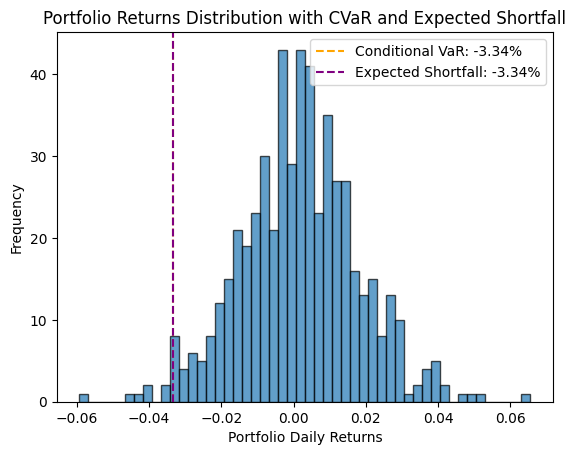

In [23]:
def visualize_risk_measures(cvar, es):
    """Visualize CVaR and ES with portfolio returns."""
    plt.hist(portfolio.portfolio_returns(), bins=50, edgecolor='k', alpha=0.7)
    plt.axvline(x=cvar, color='orange', linestyle='--', label=f"Conditional VaR: {cvar * 100:.2f}%")
    plt.axvline(x=es, color='purple', linestyle='--', label=f"Expected Shortfall: {es * 100:.2f}%")
    plt.title("Portfolio Returns Distribution with CVaR and Expected Shortfall")
    plt.xlabel("Portfolio Daily Returns")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Visualize CVaR and ES
visualize_risk_measures(cvar, es)